In [ ]:
import pandas as pd
import numpy as np
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [ ]:
df = web.DataReader('QQQ', data_source='yahoo', start='2000-01-01', end='2021-05-25')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,96.187500,90.750000,96.187500,94.750000,36345200.0,82.267441
2000-01-04,93.500000,87.937500,92.000000,88.250000,33786600.0,76.623764
2000-01-05,89.625000,84.250000,87.500000,86.000000,42496600.0,74.670212
2000-01-06,88.000000,79.750000,86.875000,80.093750,37134800.0,69.542053
2000-01-07,90.000000,82.500000,82.937500,90.000000,28138200.0,78.143234
...,...,...,...,...,...,...
2021-05-19,322.899994,316.299988,316.660004,322.589996,66319100.0,322.216217
2021-05-20,329.709991,323.890015,324.119995,328.829987,46466100.0,328.448975
2021-05-21,330.859985,326.640015,330.429993,327.010010,50330400.0,326.631104


In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

4307

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.23199254],
       [0.21180307],
       [0.20481441],
       ...,
       [0.95340892],
       [0.97049231],
       [0.97192108]])

In [ ]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()
    

[array([0.23199254, 0.21180307, 0.20481441, 0.18646917, 0.2172387 ,
       0.22500388, 0.21102655, 0.20500854, 0.22112129, 0.22772169,
       0.22927473, 0.23587513, 0.23296319, 0.23665165, 0.22228606,
       0.22655691, 0.21490914, 0.21898586, 0.20481441, 0.21626805,
       0.22374204, 0.22616865, 0.23742817, 0.23946653, 0.24364031,
       0.25645286, 0.24519335, 0.25528808, 0.24791116, 0.2475229 ,
       0.24975539, 0.24829942, 0.25489982, 0.24344618, 0.24441683,
       0.26150023, 0.26848889, 0.26091784, 0.26072371, 0.26926541,
       0.27198322, 0.26424231, 0.28266034, 0.28537816, 0.28013666,
       0.28324273, 0.2948905 , 0.29333747, 0.28401925, 0.2712067 ,
       0.25722938, 0.27547755, 0.28188383, 0.27217735, 0.28479577,
       0.29178443, 0.29799658, 0.30284981, 0.3034322 , 0.29411399])]
[0.27936014181312885]

[array([0.23199254, 0.21180307, 0.20481441, 0.18646917, 0.2172387 ,
       0.22500388, 0.21102655, 0.20500854, 0.22112129, 0.22772169,
       0.22927473, 0.23587513, 0.23

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print(x_train.shape)

(4247, 60, 1)


In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

4247/4247 [==============================] - 94s 22ms/step - loss: 2.1104e-04


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)

0.6280475885894662


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


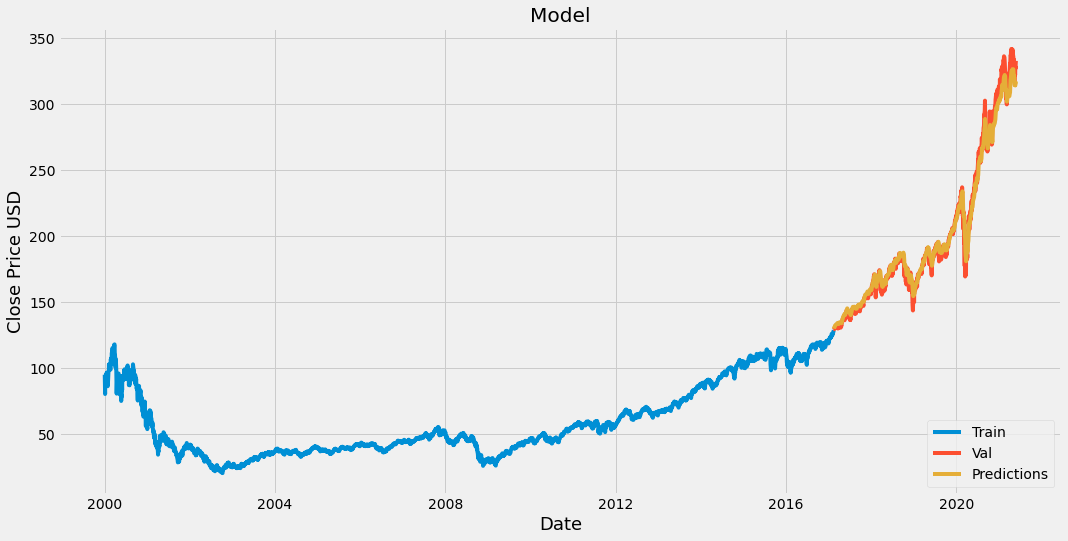

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()



In [ ]:
valid

,Close,Predictions
Date,,
2017-02-15,129.289993,129.651855
2017-02-16,129.250000,130.151642
2017-02-17,129.809998,130.568115
2017-02-21,130.449997,130.977112
2017-02-22,130.500000,131.420258
...,...,...
2021-05-19,322.589996,314.473663
2021-05-20,328.829987,314.294128
2021-05-21,327.010010,315.240356
